In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load and Preprocess Data
data = pd.read_csv('train.csv')

In [5]:
# Feature engineering
data = data.assign(
    AgeOfHouse = 2023 - data['YearBuilt'],
    TotalSF = data['GrLivArea'] + data['TotalBsmtSF']
)

In [9]:
# Handle missing values
data = data.fillna({
    'LotFrontage': data['LotFrontage'].median(),
    'MasVnrArea': 0
})


In [11]:
# Select features
features = ['LotArea', 'OverallQual', 'AgeOfHouse', 'TotalSF', 'FullBath', 'GarageCars']
X = data[features]
y = np.log(data['SalePrice'])

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Build Linear Regression Model
lr_reg = LinearRegression()

In [19]:
# Train Linear Regression Model
lr_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
# Evaluate Model
y_pred = lr_reg.predict(X_test_scaled)

In [23]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print("=== Model Performance ===")
print(f"RMSE (log scale): {rmse:.4f}")
print(f"MAE (log scale): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


=== Model Performance ===
RMSE (log scale): 0.1717
MAE (log scale): 0.1195
R2 Score: 0.8420


In [25]:
# Convert back to original price scale
actual_prices = np.exp(y_test)
predicted_prices = np.exp(y_pred)

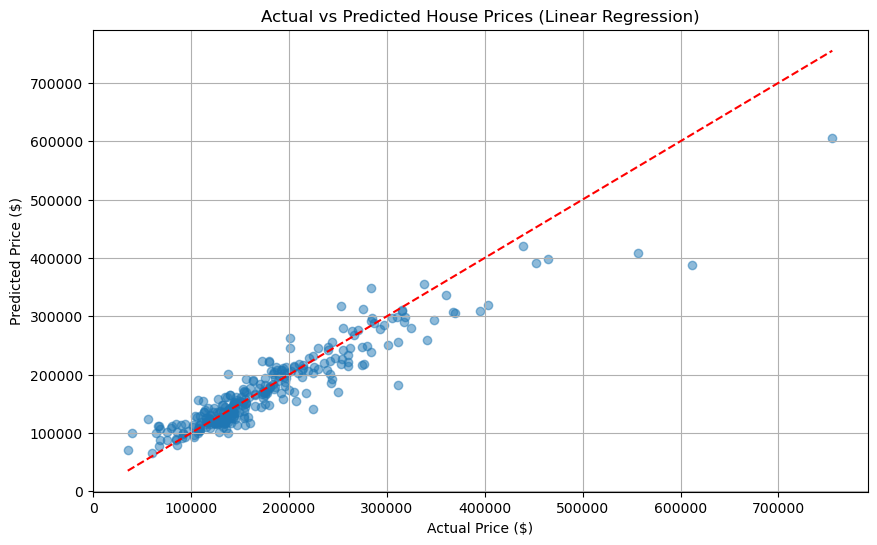

In [27]:
# Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], 
         [actual_prices.min(), actual_prices.max()], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.grid(True)
plt.show()


Sample Price Predictions:
      Actual Price  Predicted Price  Absolute Error  Percentage Error
892       154500.0        138082.87        16417.13             10.63
1105      325000.0        279647.82        45352.18             13.95
413       115000.0        125890.43        10890.43              9.47
522       159000.0        162346.50         3346.50              2.10
1036      315500.0        310593.47         4906.53              1.56
614        75500.0         88015.05        12515.05             16.58
218       311500.0        182221.35       129278.65             41.50
1160      146000.0        161763.68        15763.68             10.80
649        84500.0         87803.83         3303.83              3.91
887       135500.0        126627.60         8872.40              6.55

Overall Performance Metrics:
MAE (Mean Absolute Error): $20,776.61
RMSE (Root Mean Squared Error): $32,338.43
MAPE (Mean Absolute Percentage Error): 12.48%


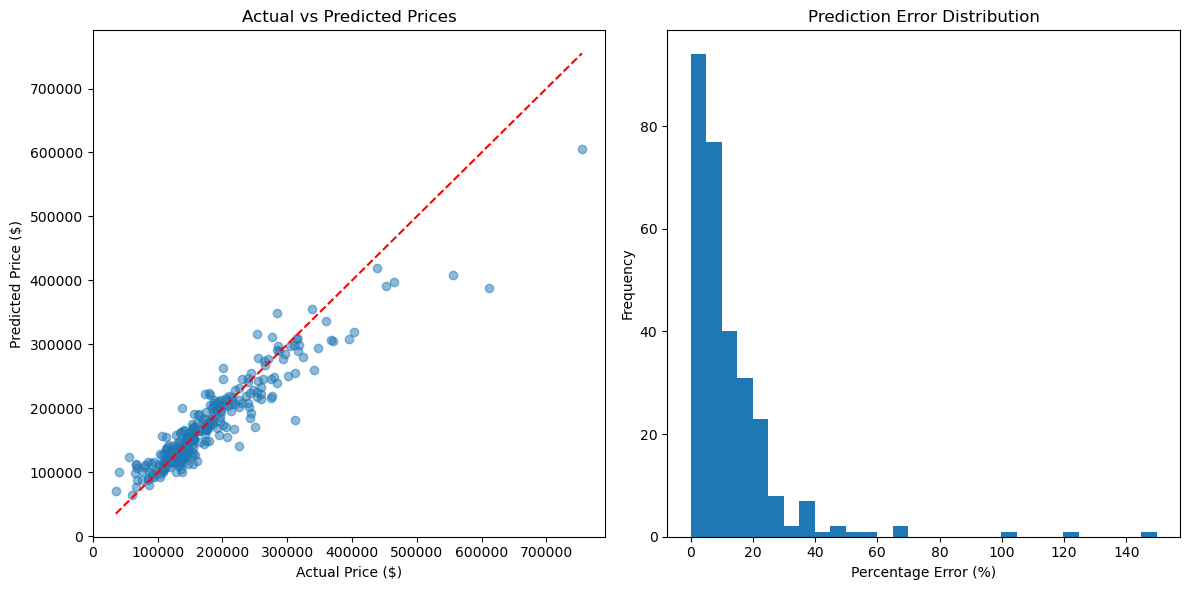

In [29]:
# Create comparison DataFrame
results_df = pd.DataFrame({
    'Actual Price': actual_prices,
    'Predicted Price': predicted_prices,
    'Absolute Error': np.abs(actual_prices - predicted_prices),
    'Percentage Error': (np.abs(actual_prices - predicted_prices) / actual_prices * 100)
})

# Display first 10 comparisons
print("Sample Price Predictions:")
print(results_df.head(10).round(2))

# Calculate overall metrics
mae = np.mean(results_df['Absolute Error'])
mape = np.mean(results_df['Percentage Error'])
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"\nOverall Performance Metrics:")
print(f"MAE (Mean Absolute Error): ${mae:,.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(actual_prices, predicted_prices, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], 
         [actual_prices.min(), actual_prices.max()], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')

# Error distribution
plt.subplot(1, 2, 2)
plt.hist(results_df['Percentage Error'], bins=30)
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')

plt.tight_layout()
plt.show()

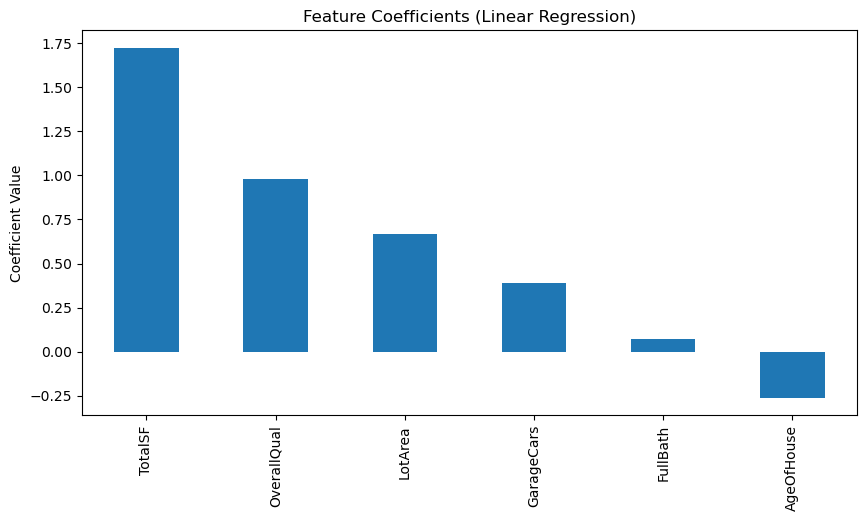


Linear Regression Coefficients (log scale):
LotArea: 0.6691
OverallQual: 0.9809
AgeOfHouse: -0.2618
TotalSF: 1.7240
FullBath: 0.0730
GarageCars: 0.3875

Intercept: 10.9656


In [33]:
plt.figure(figsize=(10, 5))
coefficients = pd.Series(lr_reg.coef_, index=features).sort_values(ascending=False)
coefficients.plot(kind='bar', title='Feature Coefficients (Linear Regression)')
plt.ylabel('Coefficient Value')
plt.show()

print("\nLinear Regression Coefficients (log scale):")
for feature, coef in zip(features, lr_reg.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {lr_reg.intercept_:.4f}")

<Figure size 1200x800 with 0 Axes>

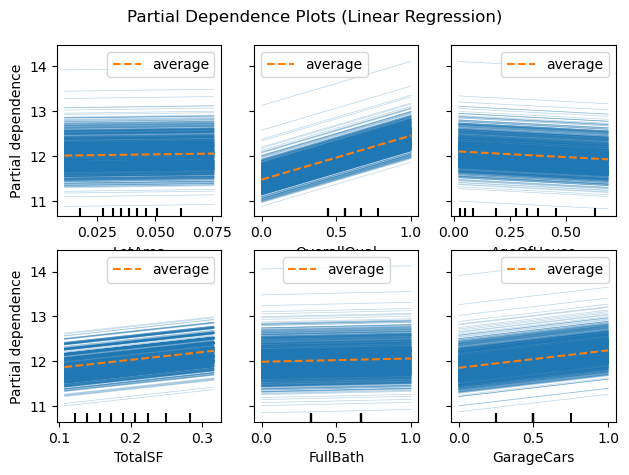

In [55]:
from sklearn.inspection import PartialDependenceDisplay
plt.figure(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    lr_reg, 
    X_train_scaled, 
    features=range(len(features)), 
    feature_names=features,
    kind='both'  
)
plt.suptitle('Partial Dependence Plots (Linear Regression)')
plt.tight_layout()
plt.show()

In [56]:
equation = f"log(Price) = {lr_reg.intercept_:.2f}"
for feat, coef in zip(features, lr_reg.coef_):
    equation += f" + ({coef:.2f} × {feat})"
    
print("Linear Regression Prediction Equation:")
print(equation)

Linear Regression Prediction Equation:
log(Price) = 10.97 + (0.67 × LotArea) + (0.98 × OverallQual) + (-0.26 × AgeOfHouse) + (1.72 × TotalSF) + (0.07 × FullBath) + (0.39 × GarageCars)
